# Syllabys

1. [Overview](#overview)
2. [Tensors and accelerated software](#tensors-and-accelerated-software)
3. [PyTorch data interfaces](#pytorch-data-interfaces)
4. [Model structure](#model-structure)
5. [Training process](#model-training)
6. [References and materials](#materials-and-usefull-links)

# Overview

<h3>Neural network workflow</h3>

![Neural network workflow](https://miro.medium.com/v2/resize:fit:1400/1*ZXAOUqmlyECgfVa81Sr6Ew.png)

Neural network principles:

1. Forward propagation:

    1. Input
    2. Hidden state
    3. Activation function
    4. Output

<br/>

2. Backward propagation:

    1. Loss function
    2. Optimization and weight update


Iterative repetition of forward and backward propagation to minimize loss function and get optimal weights.

<h3>NumPy-based neural network (example on logistic regression)</h3>



In [1]:
# Initialize required functions

import numpy as np

logistic_function = lambda x: 1/ (1 + np.exp(-x))


def compute_cost(theta, x, y):
    m = len(y)
    y_pred = logistic_function(np.dot(x , theta))
    error = (y * np.log(y_pred)) + ((1 - y) * np.log(1 - y_pred))
    cost = -1 / m * sum(error)
    gradient = 1 / m * np.dot(x.transpose(), (y_pred - y))
    return cost[0] , gradient


def gradient_descent(x, y, theta, alpha, iterations):
    costs = []
    for i in range(iterations):
        cost, gradient = compute_cost(theta, x, y)
        theta -= (alpha * gradient)
        costs.append(cost)
    return theta, costs


In [2]:
# Initialize mock data

from sklearn.datasets import make_classification

X, y = make_classification(
    n_features=4, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)

theta_init = np.zeros((X.shape[1], X.shape[0]))
cost, gradient = compute_cost(theta_init, X, y)

print("Cost at initialization", cost)
print("Gradient at initialization:", gradient)

KeyboardInterrupt: 

In [ ]:
theta, costs = gradient_descent(X, y, theta_init, 1, 200)

print("Theta after running gradient descent:", theta)
print("Resulting cost:", costs[-1])

Theta after running gradient descent: [[ 0.84258378 -0.84258378 -0.84258378 -0.84258378 -0.84258378  0.84258378
   0.84258378  0.84258378  0.84258378 -0.84258378  0.84258378 -0.84258378
   0.84258378 -0.84258378  0.84258378  0.84258378  0.84258378 -0.84258378
   0.84258378 -0.84258378 -0.84258378 -0.84258378 -0.84258378 -0.84258378
  -0.84258378 -0.84258378  0.84258378  0.84258378  0.84258378 -0.84258378
   0.84258378 -0.84258378 -0.84258378 -0.84258378  0.84258378  0.84258378
  -0.84258378  0.84258378  0.84258378  0.84258378  0.84258378 -0.84258378
  -0.84258378  0.84258378 -0.84258378 -0.84258378 -0.84258378 -0.84258378
   0.84258378  0.84258378  0.84258378 -0.84258378 -0.84258378  0.84258378
   0.84258378  0.84258378  0.84258378  0.84258378  0.84258378 -0.84258378
  -0.84258378  0.84258378 -0.84258378  0.84258378 -0.84258378 -0.84258378
  -0.84258378  0.84258378  0.84258378  0.84258378 -0.84258378 -0.84258378
  -0.84258378  0.84258378 -0.84258378  0.84258378 -0.84258378 -0.84258378


This is an implementation of the simplest one-layer model:

![Logistic regression schema](https://media5.datahacker.rs/2021/01/83.jpg)

While in real life actual DNN architectures will use more complex architectures:

![More complex architectures](https://ascelibrary.org/cms/10.1061/(ASCE)ST.1943-541X.0003392/asset/176e59f6-aad9-4df8-9074-2b852e1155f0/assets/images/large/figure6.jpg)

![ResNet architecture](https://www.researchgate.net/publication/322621180/figure/fig2/AS:584852684410885@1516451154473/The-representation-of-model-architecture-image-for-ResNet-152-VGG-19-and-two-layered.png)

<h2>DL frameworks are the tools that make DL processes less difficult</h2>

Frameworks offer:

- abstraction from the low-level operation with matrices and complex math operation 
- high-level programming interface and tools for building blocks to design, train, and validate deep neural networks
- parallelizing of the operation to accelerate processes
- automation of optimization and backpropagation


According to [Papers with code](https://paperswithcode.com/trends) among most implemented papers in Python at the moment there are next top-3 frameworks:


![Framework trends](supplementary_data/frameworks_usage_trends.png)

- PyTorch (60% of repositores with paper implementations)
- TensorFlow (3% of repositores with paper implementations)
- JAX (2% of repositores with paper implementations)


On Sep 2020, the top was:

- PyTorch (50%)
- TensorFlow (20%)
- JAX (0%)

# Tensors and accelerated software

`Tensors` are a specialized `data structure` that are very similar to arrays and matrices. In PyTorch, tensors are used to `encode the inputs and outputs of a model`, as well as the `model’s parameters`.

A tensor is the abstract version of nested lists of numbers. A 'vector' is a one-dimensional tensor. A 'matrix' is a two-dimensional tensor, and higher dimensions are referred to as 'n-dimensional tensors'.

Tensors are similar to NumPy’s ndarrays, except that tensors can `run on GPUs` or other hardware accelerators. 

In [ ]:
!pip3 install torch Pillow

^C



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import torch
import numpy as np

In [ ]:
# Initialize a Tensor

data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
print(x_data)

np_array = np.array(data)
x_np = torch.from_numpy(np_array)
print(x_np)

print(f"Shape of tensor: {x_data.shape}")
print(f"Datatype of tensor: {x_data.dtype}")
print(f"Device tensor is stored on: {x_data.device}")

tensor([[1, 2],
        [3, 4]])
tensor([[1, 2],
        [3, 4]], dtype=torch.int32)
Shape of tensor: torch.Size([2, 2])
Datatype of tensor: torch.int64
Device tensor is stored on: cpu


Over 100 tensor operations, including arithmetic, linear algebra, matrix manipulation (transposing, indexing, slicing), sampling and more are comprehensively described [here](https://pytorch.org/docs/stable/torch.html) or more generally [here](https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html#operations-on-tensors).



<h3>CUDA</h3>

CUDA® is a parallel computing platform and programming model developed by NVIDIA for general computing on graphical processing units (GPUs). With CUDA, developers are able to dramatically speed up computing applications by harnessing the power of GPUs.


In GPU-accelerated applications, the sequential part of the workload runs on the CPU – which is optimized for single-threaded performance – while the compute intensive portion of the application runs on thousands of GPU cores in parallel. 

CUDA installation is available on [NVIDIA's official website](https://developer.nvidia.com/cuda-toolkit).


`torch.cuda` is used to set up and run CUDA operations. It keeps track of the currently selected GPU, and all CUDA tensors you allocate will by default be created on that device. The selected device can be changed with a `torch.cuda.device` context manager.

However, once a tensor is allocated, you can do operations on it irrespective of the selected device, and the results will be always placed on the same device as the tensor.



In [ ]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
    x_data = x_data.to("cuda")
    print(f"Device tensor is stored on: {x_data.device}")

# or use:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
x_data = x_data.to(device)

# if more than one GPU is available, you can select the specific one (index starts from 0)
cuda0 = torch.device('cuda:0')

Device tensor is stored on: cuda:0


Usage of the CUDA significantly speeds up models processes, such as training or inferencing.

# PyTorch data interfaces

Usually data is the first step to all ML tasks. It defines the model's input and output.

PyTorch provides two data primitives: `torch.utils.data.DataLoader` and `torch.utils.data.Dataset` that are designed to handle and manage data for training machine learning models and serve as high-level interface.

`Dataset` stores the samples and their corresponding labels, and `DataLoader` wraps an iterable around the `Dataset` to enable easy access to the samples.

PyTorch domain libraries provide a number of pre-loaded datasets and they could be used for prototyping DL models -  [Image Datasets](https://pytorch.org/vision/stable/datasets.html), [Text Datasets](https://pytorch.org/text/stable/datasets.html), and [Audio Datasets](https://pytorch.org/audio/stable/datasets.html).

In [ ]:
# torchvision library to work with vision tasks (images, videos)
!pip install torchvision 

# torchaudio library to work with audio tasks - !pip install torchaudio


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Tabular datasets

Tabular data can be fully loaded into the memory and usually doesn't require some complex pre-processing.
So it simply can be loaded as Tensor objects without creation of interfaces.

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


X, y = make_classification(
    n_features=4, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1, n_samples=10000
)

X, y = torch.from_numpy(X), torch.from_numpy(y)

X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape

(torch.Size([7500, 4]), torch.Size([2500, 4]))

## Custom Datasets

Usually it's datasets that cannot be loaded fully into memory and require special interface for reading/transforming operation, e.g., image data, audio data, etc.

There are two types of datasets:

- map-style datasets
- iterable-style datasets

In [ ]:
!wget http://pjreddie.com/media/files/cifar.tgz && tar xzf cifar.tgz

SYSTEM_WGETRC = c:/progra~1/wget/etc/wgetrc
syswgetrc = C:\Program Files (x86)\GnuWin32/etc/wgetrc
--2024-02-02 22:10:19--  http://pjreddie.com/media/files/cifar.tgz
Resolving pjreddie.com... 162.0.215.52
Connecting to pjreddie.com|162.0.215.52|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/cifar.tgz [following]
--2024-02-02 22:10:19--  https://pjreddie.com/media/files/cifar.tgz
Connecting to pjreddie.com|162.0.215.52|:443... connected.
OpenSSL: error:1407742E:SSL routines:SSL23_GET_SERVER_HELLO:tlsv1 alert protocol version
Unable to establish SSL connection.


In [ ]:
import random
import os
import matplotlib.pyplot as plt
from PIL import Image


with open("cifar/labels.txt") as label_file:
    labels = label_file.read().split()
label_mapping = dict(zip(labels, list(range(len(labels)))))

In [ ]:
# Map-style datasets require implementation of the __getitem__() and __len__() methods

class Cifar10Dataset(torch.utils.data.Dataset):
    def __init__(self, data_dir, labels, data_size = 0, transforms = None):
        files = os.listdir(data_dir)
        files = [os.path.join(data_dir,x) for x in files]
        
        if data_size < 0 or data_size > len(files):
            assert("Data size should be between 0 to number of files in the dataset")
        
        if data_size == 0:
            data_size = len(files)
        
        self.data_size = data_size
        self.files = random.sample(files, self.data_size)
        self.transforms = transforms
        self.labels = labels
        
    def __len__(self):
        return self.data_size
    
    def __getitem__(self, idx):
        image_address = self.files[idx]
        image = Image.open(image_address)
        label_name = image_address[:-4].split("_")[-1]
        label = self.labels[label_name]
                
        if self.transforms:
            image = self.transforms(image)
        
        if isinstance(image, Image.Image):
            image = np.array(image)

        if not isinstance(image, torch.Tensor):
            image = torch.from_numpy(image)

        return image, label


torch.Size([32, 32, 3])


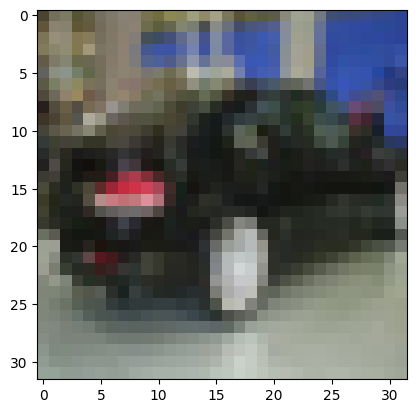

In [ ]:
train_set = Cifar10Dataset(data_dir="cifar/train/", labels=label_mapping, transforms=None)
first_img, first_label = train_set[0]

print(first_img.shape)
plt.imshow(first_img)

torch.Size([32, 32])


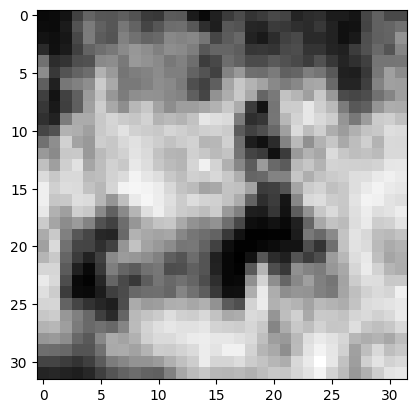

In [ ]:
import torchvision.transforms as transforms


train_set = Cifar10Dataset(data_dir="cifar/train/", labels=label_mapping, transforms=transforms.Grayscale())
first_img, first_label = train_set[0]

print(first_img.shape)
plt.imshow(first_img, cmap='gray')

In [ ]:
dir(transforms)

['AugMix',
 'AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'ElasticTransform',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional_pil',
 '_functional_tensor',
 '_presets',
 'autoaugment',
 'functional',
 'transforms']

## DataLoaders

DataLoader functions are:

1. Batching of Data
2. Shuffling of Data
3. Loading multiple data at a single time using threads
4. Prefetching, that is, while GPU processes the current batch, `DataLoader` can load the next batch into memory in meantime. This means GPU doesn't have to wait for the next batch and it speeds up training.

`DataLoader` is instantiated with a `Dataset` object, then it can be iterated in the same way as `Dataset`.

In [ ]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=8)

In [ ]:
train_features, train_labels = next(iter(train_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

Feature batch shape: torch.Size([8, 32, 32])
Labels batch shape: torch.Size([8])


In [ ]:
?torch.utils.data.DataLoader

Init signature:
torch.utils.data.DataLoader(
    dataset: torch.utils.data.dataset.Dataset[+T_co],
    batch_size: Optional[int] = 1,
    shuffle: Optional[bool] = None,
    sampler: Union[torch.utils.data.sampler.Sampler, Iterable, NoneType] = None,
    batch_sampler: Union[torch.utils.data.sampler.Sampler[List], Iterable[List], NoneType] = None,
    num_workers: int = 0,
    collate_fn: Optional[Callable[[List[~T]], Any]] = None,
    pin_memory: bool = False,
    drop_last: bool = False,
    timeout: float = 0,
    worker_init_fn: Optional[Callable[[int], NoneType]] = None,
    multiprocessing_context=None,
    generator=None,
    *,
    prefetch_factor: Optional[int] = None,
    persistent_workers: bool = False,
    pin_memory_device: str = '',
)
Docstring:     
Data loader combines a dataset and a sampler, and provides an iterable over the given dataset.

The :class:`~torch.utils.data.DataLoader` supports both map-style and
iterable-style datasets with single- or multi-process load

## Community datasets could be loaded using special libraries such as `torchvision` for CV tasks, `torchaudio` for audio and signal processing tasks or `torchtext` for NLP tasks

In [ ]:
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader


transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./cifar/train/', transform=transform, download=True)
trainloader = DataLoader(trainset, batch_size=batch_size,
                         shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./cifar/test/', transform=transform,  download=True)
testloader = DataLoader(testset, batch_size=batch_size,
                        shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


# Model Structure

Single neuron:

- takes some set of inputs
- generates a corresponding scalar output
- has a set of associated parameters that can be updated to optimize some objective function of interest


In more complex network where multiple outputs are needed, the more complex subject is used - `layer`, a collection of multiple neurons:

- take a set of inputs
- generate corresponding outputs
- are described by a set of tunable parameters


Neural network:

- complex of layers
- takes in raw inputs (the features)
- generates outputs (the predictions)
- possesses parameters (the combined parameters from all constituent layers)



To improve level of abstraction, the concept of `module` is introduced. 
A module could describe a single layer, a component consisting of multiple layers, or the entire model itself.

The PyTorch `nn` module is a core component facilitating the construction and training of neural networks. 
It provides a high-level abstraction for designing and implementing neural network architectures.

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F

In PyTorch `nn` module could be split into next groups:

- containers - Module, Sequential
- linear - Linear
- activations - non-linear units (ReLU, Sigmoid, LeakyReLU, Tanh, Softmax, etc.)
- normalizations - BatchNorm, LayerNorm, different variations
- loss functions - L1Loss, MSELoss, CrossEntropyLoss, etc.
- matrix layers (usually for CV tasks) - convolutional, pooling, padding, dropout
- sequential layers (usually for NLP tasks) - recurrent (RNN, LSTM, GRU), transformer (model, encoder, decoder), sparse


Every module in PyTorch subclasses the `nn.Module`. A neural network is a module itself that consists of other modules (layers). This nested structure allows for building and managing complex architectures easily.

Full list of possible modules is listed in [PyTorch nn documentation](https://pytorch.org/docs/stable/nn.html#).

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_1 = nn.Linear(28*28, 512)
        self.linear_2 = nn.Linear(512, 512)
        self.out_layer = nn.Linear(512, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.linear_1(x))
        x = F.relu(self.linear_2(x))
        
        return self.out_layer(x)

model = NeuralNetwork()

# Note that functional modules that are used in forward-propogation are not displayed here; 
# only modules from constructor are displayed
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_1): Linear(in_features=784, out_features=512, bias=True)
  (linear_2): Linear(in_features=512, out_features=512, bias=True)
  (out_layer): Linear(in_features=512, out_features=10, bias=True)
)


In cases similar to above where the output of previous layers go straight to the input of next layers without any additional processing - `Sequential` module could be used to design better network.

In [ ]:
class NeuralNetwork_2(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
    
model_2 = NeuralNetwork_2()
print(model_2)

NeuralNetwork_2(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Some of modules could have alternative version with `Lazy` prefix in name.

Modules that lazily initialize parameters, or “lazy modules”, derive the shapes of their parameters from the first input(s) to their forward method. Until that first forward they contain `torch.nn.UninitializedParameter`'s that should not be accessed or used, and afterward they contain regular `torch.nn.Parameter`'s.

In [ ]:
class NeuralNetwork_3(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.LazyLinear(512),
            nn.ReLU(),
            nn.LazyLinear(512),
            nn.ReLU(),
            nn.LazyLinear(10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
    
model_3 = NeuralNetwork_3()
print(model_3)

NeuralNetwork_3(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): LazyLinear(in_features=0, out_features=512, bias=True)
    (1): ReLU()
    (2): LazyLinear(in_features=0, out_features=512, bias=True)
    (3): ReLU()
    (4): LazyLinear(in_features=0, out_features=10, bias=True)
  )
)


c:\Users\gaend\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Classification models above return `logits` - the vector of raw (non-normalized) predictions that a classification model generates, which is ordinarily then passed to a normalization function. 

If the model is solving a multi-class classification problem, logits typically become an input to the `Softmax` function. The softmax function then generates a vector of (normalized) probabilities with one value for each possible class.

If only top class is needed from the output model - the normalization function could be swapped to `argmax` function.


Customary, `logits` are the final output of the model and it's normalization is performed outside model structure.

## Custom layers

In [ ]:
# Layer without parameters; used to implement functional modules like activation functions, etc

class CenteredLayer(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, X):
        return X - X.mean()
    
layer = CenteredLayer()
layer(torch.tensor([1.0, 2, 3, 4, 5]))

tensor([-2., -1.,  0.,  1.,  2.])

In [ ]:
net = nn.Sequential(nn.LazyLinear(128), CenteredLayer())
Y = net(torch.rand(4, 8))
Y.mean()

tensor(2.3283e-09, grad_fn=<MeanBackward0>)

In [ ]:
# Layer with parameters that could be learned during back-propagation

class MyLinear(nn.Module):
    def __init__(self, in_units, units):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(in_units, units))
        self.bias = nn.Parameter(torch.randn(units,))

    def forward(self, X):
        linear = torch.matmul(X, self.weight.data) + self.bias.data
        return F.relu(linear)
    
linear = MyLinear(5, 3)
linear.weight

Parameter containing:
tensor([[ 0.5776,  0.4297,  0.4078],
        [-0.4767,  1.1306,  1.3525],
        [ 0.5508, -1.2966, -1.1010],
        [ 1.2162, -1.5141, -0.1564],
        [ 1.9982, -0.2071,  1.1219]], requires_grad=True)

In [ ]:
linear(torch.rand(2, 5))

tensor([[2.4020, 0.6464, 0.4667],
        [2.4854, 0.2796, 0.0000]])

In [ ]:
net = nn.Sequential(MyLinear(64, 8), MyLinear(8, 1))
net(torch.rand(2, 64))

tensor([[9.3493],
        [0.0000]])

# Model training

## Auto-differentiation

<h3>Background</h3>

Neural networks (NNs) are a collection of nested functions that are executed on some input data. These functions are defined by parameters (consisting of weights and biases), which in PyTorch are stored in tensors.

Training a NN happens in two steps:

`Forward Propagation`: In forward prop, the NN makes its best guess about the correct output. It runs the input data through each of its functions to make this guess.

`Backward Propagation`: In backprop, the NN adjusts its parameters proportionate to the error in its guess. It does this by traversing backwards from the output, collecting the derivatives of the error with respect to the parameters of the functions (gradients), and optimizing the parameters using gradient descent. 

Simple NN with 5 neurons:

![Network structure](./supplementary_data/graph_example.png)


Plotting computational graphs helps us visualize the dependencies of operators and variables within the calculation.

![Network backpropoogation graph](./supplementary_data/graph_backpropogation.png)

To make work with model easier, the algorithm of `auto-differentiation` is introduced.

To compute parameter gradients, PyTorch has a built-in differentiation engine called `torch.autograd`. It supports automatic computation of gradient for any `computational graph`.

In [ ]:
import torch

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output

w1 = torch.randn(5, 3, requires_grad=True)
w2 = torch.randn(5, 3, requires_grad=True)
w3 = torch.randn(3, requires_grad=True)
w4 = torch.randn(3, requires_grad=True)

b = torch.matmul(x, w1)
c = torch.matmul(x, w2)

d = w3 * b + w4 * c

loss = torch.nn.functional.binary_cross_entropy_with_logits(d, y)

In [ ]:
print(f"Gradient function for d = {d.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

Gradient function for d = <AddBackward0 object at 0x0000023222B88430>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x0000023222B88430>


To optimize weights of parameters in the neural network, we need to compute the derivatives of our loss function with respect to parameters.

To compute those derivatives, we call `loss.backward()`, and then retrieve the values from corresponding parameters.

In [ ]:
loss.backward()
print(w1.grad)
print(w2.grad)
print(w3.grad)
print(w4.grad)

tensor([[0.0660, 0.0613, 0.1841],
        [0.0660, 0.0613, 0.1841],
        [0.0660, 0.0613, 0.1841],
        [0.0660, 0.0613, 0.1841],
        [0.0660, 0.0613, 0.1841]])
tensor([[ 0.0581, -0.0622, -0.0642],
        [ 0.0581, -0.0622, -0.0642],
        [ 0.0581, -0.0622, -0.0642],
        [ 0.0581, -0.0622, -0.0642],
        [ 0.0581, -0.0622, -0.0642]])
tensor([ 0.2690, -0.0230, -0.1353])
tensor([-0.0643,  0.0767, -0.6385])


By default, all tensors with `requires_grad=True` are tracking their computational history and support gradient computation. 

However, there are some cases when we do not need to do that. For example, when we have trained the model and just want to apply it to some input data, i.e. we only want to do forward computations through the network. 

Or to mark some parameters in your neural network as `frozen parameters`, so they won't change during training.

In [ ]:
b = torch.matmul(x, w1)
print(b.requires_grad)


# We can stop tracking computations by surrounding our computation code with `torch.no_grad()` block:

with torch.no_grad():
    b = torch.matmul(x, w1)
print(b.requires_grad)


# With `torch.inference_mode()` block:

with torch.inference_mode():
    b = torch.matmul(x, w1)
print(b.requires_grad)


# using `.detach()` method:

b = torch.matmul(x, w1).detach()
print(b.requires_grad)


# disabling `requires_grad` flag 
b = torch.matmul(x, w1).detach()
b.requires_grad = False
print(b.requires_grad)

True
False
False
False
False


More about disabling could be read on [PyTorch auto-grad documentation](https://pytorch.org/docs/stable/notes/autograd.html#locally-disabling-gradient-computation).

## Optimization loop

The NN model is trained in the iteration of the loop that optimizes models' weights. Such iterations are called an `epoch`.

Each epoch consists of two main parts:

- `The Train Loop` - iterate over the training dataset and try to converge to optimal parameters.
- `The Validation/Test Loop` - iterate over the test dataset to check if model performance is improving.


When presented with some training data, the untrained network is likely not to give the correct answer. 

`Loss function` measures the degree of dissimilarity of obtained result to the target value, and it is the loss function that we want to minimize during training. To calculate the loss we make a prediction using the inputs of our given data sample and compare it against the true data label value.


Common loss functions include `nn.MSELoss (Mean Square Error)` for `regression` tasks, and `nn.CrossEntropyLoss` for `classification` tasks.


Optimization is the process of adjusting model parameters to reduce model error in each training step. `Optimization algorithms` define how this process is performed (e.g., `Stochastic Gradient Descent`, `Adam`, `RMSProp`, etc).

Inside the training loop, optimization happens in three steps:

- Call `optimizer.zero_grad()` to reset the gradients of model parameters. Gradients by default add up; to prevent double-counting, we explicitly zero them at each iteration.
- Backpropagate the prediction loss with a call to `loss.backward()`. PyTorch deposits the gradients of the loss for each parameter.
- Once we have our gradients, we call `optimizer.step()` to adjust the parameters by the gradients collected in the backward pass.



In [ ]:
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader


transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./cifar/train/', transform=transform)
train_loader = DataLoader(trainset, batch_size=batch_size,
                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./cifar/test/', transform=transform)
test_loader = DataLoader(testset, batch_size=batch_size,
                         shuffle=False, num_workers=2)

In [ ]:
with open("cifar/labels.txt") as label_file:
    labels = label_file.read().split()
label_mapping = dict(zip(labels, list(range(len(labels)))))

In [ ]:
input_size = torch.numel(trainset[0][0])
output_size = len(label_mapping)

input_size, output_size

(3072, 10)

In [ ]:
import torch
from torch import nn
from torch import  functional as F

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


class CIFAR10Model(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_size, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, output_size),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
    
model = CIFAR10Model(input_size, output_size).to(device)
print(model)

CIFAR10Model(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=3072, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [ ]:
learning_rate = 1e-3
epochs = 10

# Initialize the loss function; also called `criterion`
loss_fn = nn.CrossEntropyLoss()

# Initialize optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
from tqdm import tqdm

In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer, epoch):
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    
    tqdm_loader = tqdm(dataloader, unit="batch", desc=f"Epoch {epoch}", total=len(dataloader))
    for batch, (X, y) in enumerate(tqdm_loader):
        # Compute prediction and loss
        X, y = X.to(device), y.to(device)
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 1000 == 0:
            tqdm_loader.set_postfix(loss=loss.item())


def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True

    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
for t in range(epochs):
    train_loop(train_loader, model, loss_fn, optimizer, epoch=t)
    test_loop(test_loader, model, loss_fn)

torch.save(model, 'model.pth')

# OR

torch.save(model.state_dict(), 'model_state.pth')

Epoch 0:  20%|██        | 2537/12500 [00:12<00:50, 196.95batch/s, loss=2.31]


KeyboardInterrupt: 

In [ ]:
loaded_model = torch.load('model.pth')
loaded_model.eval()

# OR

loaded_model = CIFAR10Model(input_size, output_size)
loaded_model.load_state_dict(torch.load('model_state.pth'))
loaded_model.eval()

CIFAR10Model(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=3072, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

`Note:` After loading saved model, `model.eval()` method is called to set specifics layers (such as, Dropout, Normalization, etc.) to inference mode

# Materials and usefull links

1. [PyTorch Basics tytorial](https://pytorch.org/tutorials/beginner/basics/intro.html)
2. [PyTorch Data Interfaces](https://pytorch.org/docs/stable/data.html)
3. [D2L Builders' Guide](https://d2l.ai/chapter_builders-guide/index.html)
4. [PyTorch Auto-differentiation basics](https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html)
5. [PyTorch Auto-differentiation intro](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html#)
6. [PyTorch Auto-differentiation mechanics](https://pytorch.org/docs/stable/notes/autograd.html#)
7. [D2L Propogation and graphs](https://d2l.ai/chapter_multilayer-perceptrons/backprop.html)
8. [Understanding PyTorch graphs and autograd](https://blog.paperspace.com/pytorch-101-understanding-graphs-and-automatic-differentiation/)
9. [PyTorch Optimization](https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html)
10. Grokking Deep Learning by Andrew W. Trask
11. [PyTorch models visualization](https://pytorch.org/tutorials/intermediate/tensorboard_tutorial.html)

Tools:

1. [PyTorch Lightning](https://lightning.ai/pytorch-lightning) - tool upon PyTorch to make training and model designing easier
2. [Netron](https://netron.app/) - tool for visualizing the model architecture
3. [PyTorch eco-system](https://pytorch.org/ecosystem/) - list of PyTorch tools
4. [WandB](https://github.com/wandb/wandb) - tools for experementation tracking and its visualization


# Homework

1. Train NN model with custom linear architecture on MNIST or on any dataset from Kaggle (image data with resolution not higher than 80x80 pixels - 
[Sign language MNIST](https://www.kaggle.com/datasets/datamunge/sign-language-mnist), 
[A-Z Handwritten Alphabet](https://www.kaggle.com/datasets/sachinpatel21/az-handwritten-alphabets-in-csv-format), etc.)
2. Visualize epoch progress (loss and accuracy curves)
3. Visualize 10 random elements from test set and model results for those elements

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import numpy as np
import torchvision.transforms as transforms
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import plotly.express as px

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [3]:
class MNISTFingerLanguageDataset(torch.utils.data.Dataset):
    def __init__(self, dataframe, transform=None):
        self.X = dataframe.iloc[:, 1:].values.copy()
        self.y = dataframe.iloc[:, 0].values.copy()
        self.transform = transform

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        image = self.X[idx].reshape((28, 28)).astype(np.float32) / 255.0
        label = self.y[idx]

        if self.transform:
            image = self.transform(image)

        return image, label


In [4]:
train_path = 'dataset/sign_mnist_train.csv'
test_path = 'dataset/sign_mnist_test.csv'

train_df = pd.read_csv(train_path)
print(sorted(train_df['label'].unique().tolist())) # there is a gap in the labels
train_df['label'] = train_df['label'].apply(lambda x: x if x < 10 else x - 1)
test_df = pd.read_csv(test_path)
test_df['label'] = test_df['label'].apply(lambda x: x if x < 10 else x - 1)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


In [16]:
sorted(train_df['label'].unique().tolist()) # check if gap is fixed

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [5]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((28, 28)),
    transforms.Normalize((0.5), (0.5)),
])
batch_size = 5

trainset = MNISTFingerLanguageDataset(train_df, transform=transform)
train_loader = DataLoader(trainset, batch_size=batch_size,
                          shuffle=True)

testset = MNISTFingerLanguageDataset(test_df, transform=transform)
test_loader = DataLoader(testset, batch_size=batch_size,
                         shuffle=False)

In [18]:
len(train_loader), len(trainset)

(5491, 27455)

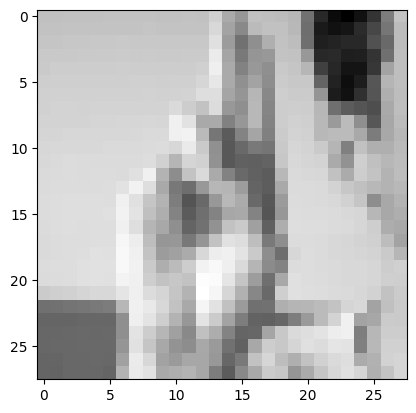

In [6]:
image, label = next(iter(train_loader))
plt.imshow(image[0].squeeze(), cmap='gray')
plt.show()

In [7]:
input_size = torch.numel(trainset[0][0])
output_size = 24

input_size, output_size

(784, 24)

In [8]:
class SignLanguageModel(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_size, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, output_size),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [9]:
def train_loop(dataloader, model, loss_fn, optimizer, epoch):
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    
    tqdm_loader = tqdm(dataloader, unit="batch", desc=f"Epoch {epoch}", total=len(dataloader))
    for batch, (X, y) in enumerate(tqdm_loader):
        # Compute prediction and loss
        X, y = X.to(device), y.to(device)
        pred = model(X)
        loss = loss_fn(pred, y)
        

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 1000 == 0:
            tqdm_loader.set_postfix(loss=loss.item())
    return loss.item()


def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True

    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

    return correct

In [16]:
epochs = 20
learning_rate = 1e-3

loss = nn.CrossEntropyLoss()
model = SignLanguageModel(input_size=input_size, output_size=output_size).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
acc_history = []
loss_history = []
for t in range(epochs):
    ep_loss = train_loop(train_loader, model, loss, optimizer, epoch=t)
    ep_acc = test_loop(test_loader, model, loss)
    acc_history.append(ep_acc)
    loss_history.append(ep_loss)

Epoch 0: 100%|██████████| 5491/5491 [00:10<00:00, 506.26batch/s, loss=2.96]


Test Error: 
 Accuracy: 20.6%, Avg loss: 2.878625 



Epoch 1: 100%|██████████| 5491/5491 [00:10<00:00, 509.21batch/s, loss=2.14]


Test Error: 
 Accuracy: 39.7%, Avg loss: 2.079512 



Epoch 2: 100%|██████████| 5491/5491 [00:11<00:00, 483.89batch/s, loss=1.66]


Test Error: 
 Accuracy: 52.1%, Avg loss: 1.664635 



Epoch 3: 100%|██████████| 5491/5491 [00:10<00:00, 517.14batch/s, loss=1.29] 


Test Error: 
 Accuracy: 58.0%, Avg loss: 1.401834 



Epoch 4: 100%|██████████| 5491/5491 [00:10<00:00, 522.00batch/s, loss=0.948]


Test Error: 
 Accuracy: 63.9%, Avg loss: 1.215507 



Epoch 5: 100%|██████████| 5491/5491 [00:10<00:00, 533.09batch/s, loss=0.789]


Test Error: 
 Accuracy: 66.9%, Avg loss: 1.106961 



Epoch 6: 100%|██████████| 5491/5491 [00:10<00:00, 532.07batch/s, loss=0.283]


Test Error: 
 Accuracy: 68.0%, Avg loss: 1.029326 



Epoch 7: 100%|██████████| 5491/5491 [00:10<00:00, 533.17batch/s, loss=0.193]


Test Error: 
 Accuracy: 67.5%, Avg loss: 1.007241 



Epoch 8: 100%|██████████| 5491/5491 [00:10<00:00, 533.14batch/s, loss=0.224]


Test Error: 
 Accuracy: 70.0%, Avg loss: 0.959415 



Epoch 9: 100%|██████████| 5491/5491 [00:10<00:00, 529.67batch/s, loss=0.206]


Test Error: 
 Accuracy: 70.8%, Avg loss: 0.928458 



Epoch 10: 100%|██████████| 5491/5491 [00:10<00:00, 533.96batch/s, loss=0.438]


Test Error: 
 Accuracy: 70.3%, Avg loss: 0.930962 



Epoch 11: 100%|██████████| 5491/5491 [00:10<00:00, 536.56batch/s, loss=0.19]  


Test Error: 
 Accuracy: 72.7%, Avg loss: 0.906681 



Epoch 12: 100%|██████████| 5491/5491 [00:10<00:00, 526.28batch/s, loss=0.447] 


Test Error: 
 Accuracy: 72.2%, Avg loss: 0.914001 



Epoch 13: 100%|██████████| 5491/5491 [00:10<00:00, 535.70batch/s, loss=0.258] 


Test Error: 
 Accuracy: 71.8%, Avg loss: 0.928521 



Epoch 14: 100%|██████████| 5491/5491 [00:10<00:00, 534.38batch/s, loss=0.0342]


Test Error: 
 Accuracy: 73.2%, Avg loss: 0.927942 



Epoch 15: 100%|██████████| 5491/5491 [00:10<00:00, 532.69batch/s, loss=0.172] 


Test Error: 
 Accuracy: 73.0%, Avg loss: 0.944857 



Epoch 16: 100%|██████████| 5491/5491 [00:10<00:00, 534.83batch/s, loss=0.161] 


Test Error: 
 Accuracy: 73.4%, Avg loss: 0.953631 



Epoch 17: 100%|██████████| 5491/5491 [00:10<00:00, 532.24batch/s, loss=0.0186]


Test Error: 
 Accuracy: 74.0%, Avg loss: 0.959080 



Epoch 18: 100%|██████████| 5491/5491 [00:10<00:00, 534.85batch/s, loss=0.0418]


Test Error: 
 Accuracy: 74.2%, Avg loss: 0.978855 



Epoch 19: 100%|██████████| 5491/5491 [00:10<00:00, 533.97batch/s, loss=0.00941]


Test Error: 
 Accuracy: 74.2%, Avg loss: 0.993035 



In [17]:
torch.save(model, 'sign_language_model.pth')

In [22]:
loaded_model = torch.load('sign_language_model.pth').to(device)

In [19]:
acc_history, loss_history

([0.20552147239263804,
  0.39723926380368096,
  0.5214723926380368,
  0.5800334634690463,
  0.6388733965421082,
  0.6692693809258227,
  0.6801450083658672,
  0.6752649191299498,
  0.6995259341885108,
  0.7081706636921361,
  0.7031511433351925,
  0.7267150027886224,
  0.7221137757947574,
  0.717930842163971,
  0.7320133853876185,
  0.7302007808142778,
  0.7335471277189068,
  0.740239821528165,
  0.7417735638594535,
  0.7421918572225321],
 [3.057779312133789,
  1.354341745376587,
  2.133244276046753,
  1.3534772396087646,
  0.4845128655433655,
  0.599757969379425,
  0.3542066216468811,
  0.4007888734340668,
  0.29594987630844116,
  0.4584660530090332,
  0.9430274963378906,
  0.1741529256105423,
  0.14384962618350983,
  0.1023159772157669,
  0.09965895116329193,
  0.13690724968910217,
  0.06010786443948746,
  0.05343817546963692,
  0.03025367483496666,
  0.04839540645480156])

### Visualize

In [20]:
x = range(len(acc_history))

acc_plot = px.line(x=x, y=acc_history, title='Accuracy over epochs')
acc_plot.show()

loss_plot = px.line(x=x, y=loss_history, title='Loss over epochs')
loss_plot.show()

In [34]:
images, labels = [], []
loaded_model.eval()
test_loader = DataLoader(testset, batch_size=1, shuffle=True)

with torch.no_grad():
    while len(images) <= 10:
        image, label = next(iter(test_loader))
        pred = loaded_model(image.to(device))
        pred = pred.argmax(1)
        for i in range(len(pred)):
            images.append(image[i])
            labels.append({'actual': label[i].item(), 'predicted': pred[i].item()})

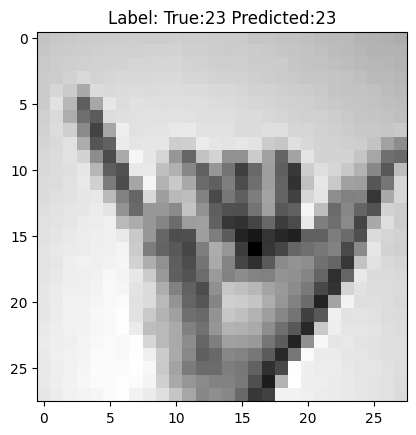

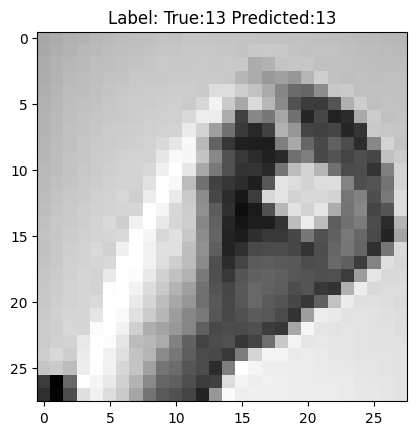

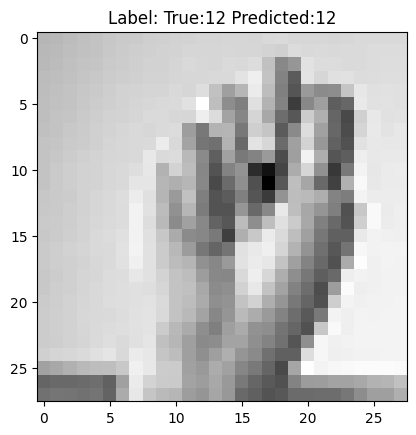

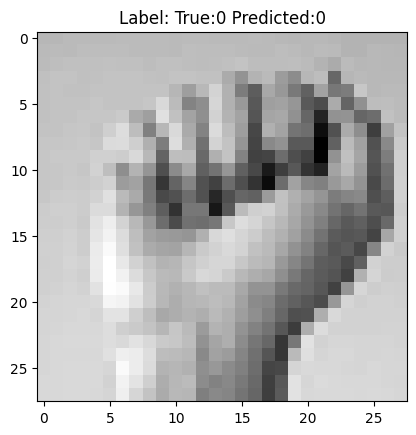

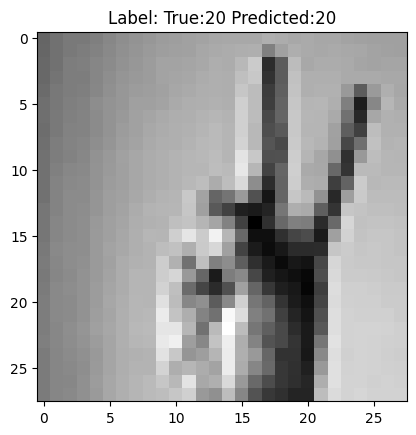

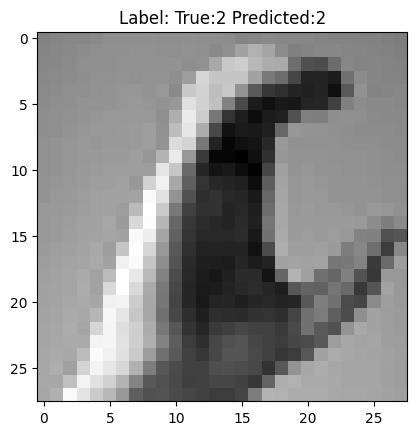

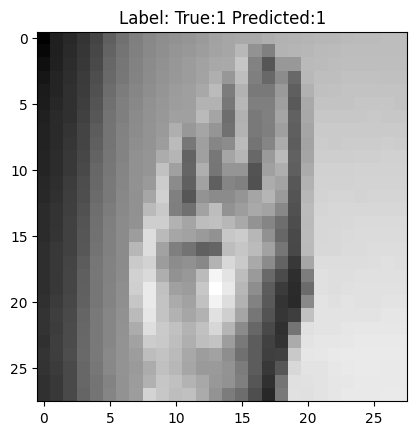

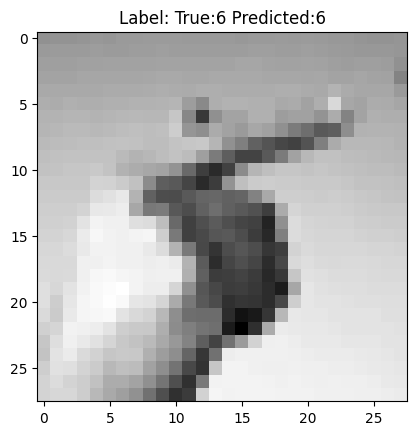

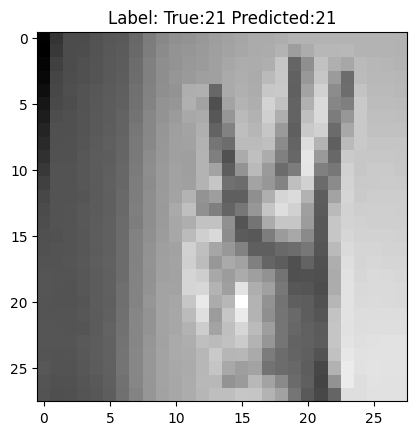

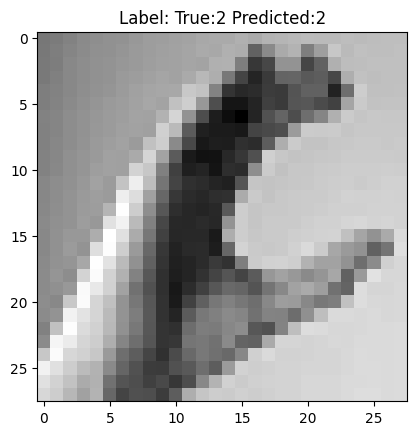

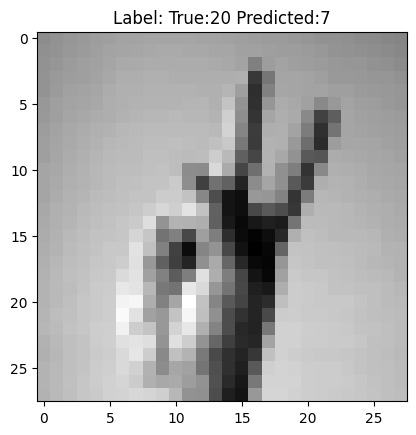

In [35]:
for image, label in zip(images, labels):
    image = image.squeeze().cpu().numpy()
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: True:{label["actual"]} Predicted:{label["predicted"]}')
    plt.show()